In [1]:
import pandas as pd
from pathlib import Path

pd.set_option('display.max_columns', None)

In [2]:
# base = Path('/Users/jasonkuruzovich/Library/CloudStorage/Box-Box/Documents/0_research/eship_vitor/I_CORPS/data/2024_617/NSF-Downloads-8july2024/')
base = Path('../Data')


df = pd.read_csv(base/'cleaned_long_xml_combined_08232024.csv')

/var/folders/51/gj2tp9pn4klb16gg85jd62zc0000gn/T/ipykernel_5150/1465406610.py:5: DtypeWarning: Columns (0,2,3,4,5,6,7,8,9,11,12,13,15,18,19,20,21,22,23,24,25,26,27,28,29,30,31,38,39,40,42,43,44,45,49,50,52,53,54,56,57,58,60,61,63,64,65,66,67,68,69,70,71,72,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(base/'cleaned_long_xml_combined_08232024.csv')


In [3]:
print("Original DataFrame:")
df.head()

Original DataFrame:


AwardID  InvestigatorNumber Directorate_Abbreviation CFDA_NUM  \
0  1341657                   1                      GEO   47.050   
1  1339934                   1                      BIO   47.074   
2  1318722                   1                      CSE   47.070   
3  1317411                   1                      CSE   47.070   
4  1347226                   1                      TIP   47.070   

  Institution_Phone Institution_OrgUEINum  \
0      2128546851.0          F4N1QNPB95M4   
1      7757844040.0          WLDGTNCFFJZ3   
2      7347636438.0          GNJ7BBP73WE9   
3      7347636438.0          GNJ7BBP73WE9   
4      6126245599.0          KABJZBBJ4B54   

                          Division_LongName   AwardInstrument  \
0            Office of Polar Programs (OPP)    Standard Grant   
1                        Emerging Frontiers    Standard Grant   
2  Division Of Computer and Network Systems    Standard Grant   
3  Division Of Computer and Network Systems    Standard Grant   
4                     Translational Impacts  Continuing Grant   

               Appropriation_Name ProgramElement2_Code  Organization_Code  \
0  NSF RESEARCH & RELATED ACTIVIT                  NaN          6090300.0   
1  NSF RESEARCH & RELATED ACTIVIT                  NaN          8040000.0   
2  NSF RESEARCH & RELATED ACTIVIT                  NaN          5050000.0   
3  NSF RESEARCH & RELATED ACTIVIT                  NaN          5050000.0   
4  NSF RESEARCH & RELATED ACTIVIT                  NaN         15030000.0   

  Institution_City Appropriation_Code  ProgramOfficer_Name Institution_State  \
0         NEW YORK               02XX          Peter Milne          New York   
1             RENO               0114      Elizabeth Blood            Nevada   
2        ANN ARBOR               0113             Fen Zhao          Michigan   
3        ANN ARBOR               0113  Alexander Sprintson          Michigan   
4      MINNEAPOLIS               0114      Pamela McCauley         Minnesota   

  Performance_Institution_CountryCode MinAmdLetterDate  AwardAmount  \
0                                  US       04/03/2014     629920.0   
1                                  US       05/14/2014     106185.0   
2                                  US       08/19/2013     488744.0   
3                                  US       08/19/2013     222947.0   
4                                  US       06/17/2014     300000.0   

  Institution_CongressDistrictOrg Agency  Year Division_Abbreviation  \
0                            NY13    NSF  2013                   OPP   
1                            NV02    NSF  2013                    EF   
2                            MI06    NSF  2013                   CNS   
3                            MI06    NSF  2013                   CNS   
4                            MN05    NSF  2013                    TI   

                           Institution_OrgLglBusName Institution_Country  \
0  THE TRUSTEES OF COLUMBIA UNIVERSITY IN THE CIT...       United States   
1  BOARD OF REGENTS OF THE NEVADA SYSTEM OF HIGHE...       United States   
2              REGENTS OF THE UNIVERSITY OF MICHIGAN       United States   
3              REGENTS OF THE UNIVERSITY OF MICHIGAN       United States   
4             REGENTS OF THE UNIVERSITY OF MINNESOTA       United States   

  Performance_Institution_CongressDistrictPerf Institution_CongressDistrict  \
0                                         NY17                         13.0   
1                                         NV02                          2.0   
2                                         MI06                          6.0   
3                                         MI06                          6.0   
4                                         MN05                          5.0   

  ProgramOfficer_Email Performance_Institution_City ProgramElement1_Code  \
0                  NaN                    Palisades                 5113   
1                  NaN                      

In [4]:
df.shape

(1889712, 74)

In [5]:
df.columns

Index(['AwardID', 'InvestigatorNumber', 'Directorate_Abbreviation', 'CFDA_NUM',
       'Institution_Phone', 'Institution_OrgUEINum', 'Division_LongName',
       'AwardInstrument', 'Appropriation_Name', 'ProgramElement2_Code',
       'Organization_Code', 'Institution_City', 'Appropriation_Code',
       'ProgramOfficer_Name', 'Institution_State',
       'Performance_Institution_CountryCode', 'MinAmdLetterDate',
       'AwardAmount', 'Institution_CongressDistrictOrg', 'Agency', 'Year',
       'Division_Abbreviation', 'Institution_OrgLglBusName',
       'Institution_Country', 'Performance_Institution_CongressDistrictPerf',
       'Institution_CongressDistrict', 'ProgramOfficer_Email',
       'Performance_Institution_City', 'ProgramElement1_Code',
       'ProgramElement3_Code', 'TRAN_TYPE',
       'Performance_Institution_StreetAddress', 'AwardTotalIntnAmount',
       'ProgramReference_Text', 'NSF_PAR_USE_FLAG', 'AwardExpirationDate',
       'ARRAAmount', 'Appropriation_SymbolID', 'Performa

In [6]:
#Creating PersonID
df['PersonID'] = df['Investigator_FirstName'].str.strip() + '_' + df['Investigator_LastName'].str.strip()

In [9]:
df['PersonID'].value_counts()

None_None                2803
Jeremy_Taylor             540
Nancy_Gray                302
Carlyle_Storm             183
Alexander_Cruickshank     183
                         ... 
Lars_Johnson                1
Amanda_Rossillo             1
James_Charles               1
Patricia_DeLacey            1
Rebecca_Lamb                1
Name: PersonID, Length: 208722, dtype: int64

In [10]:
# Step 2: Identify and Label Grants
def label_grant_type(title):
    if pd.isna(title):
        return 'Unknown'
    elif 'Research' in title:
        return 'Research'
    elif 'I-Corps' in title:
        return 'I-Corps'
    elif 'SBIR' in title:
        return 'SBIR'
    elif 'STTR' in title:
        return 'STTR'
    else:
        return 'Other'

In [11]:
df['GrantType'] = df['AwardTitle'].apply(label_grant_type)

In [12]:
df['AwardTitle'].isnull().sum()

61647

In [13]:
df['GrantType'].value_counts()

Other       1416840
Research     366405
Unknown       61647
SBIR          31761
I-Corps        8379
STTR           4680
Name: GrantType, dtype: int64

In [14]:
columns_needed = ['PersonID', 'AwardID', 'AwardEffectiveDate', 'Investigator_FirstName', 'Investigator_LastName', 'Institution_Name', 'AwardTitle', 'AbstractNarration', 'GrantType']
grant_connections_df = df[columns_needed].copy()

In [15]:
grant_connections_df.head()

PersonID  AwardID AwardEffectiveDate Investigator_FirstName  \
0  Lorenzo_Polvani  1341657         04/01/2014                Lorenzo   
1    Franco_Biondi  1339934         06/01/2014                 Franco   
2     Atul_Prakash  1318722         09/01/2013                   Atul   
3        Kang_Shin  1317411         10/01/2013                   Kang   
4      John_Stavig  1347226         06/15/2014                   John   

  Investigator_LastName                                   Institution_Name  \
0               Polvani                                Columbia University   
1                Biondi  Board of Regents, NSHE, obo University of Neva...   
2               Prakash  Regents of the University of Michigan - Ann Arbor   
3                  Shin  Regents of the University of Michigan - Ann Arbor   
4                Stavig                University of Minnesota-Twin Cities   

                                          AwardTitle  \
0  Stratospheric Ozone Depletion and Recovery and...   
1  Collaborative Research: Extreme Events and Eco...   
2  TWC: Small: Discovering and Restricting Undesi...   
3  NeTS: Small: Collaborative Research: Efficient...   
4  Minnesota I-Corps Site (MIN-Corps): Catalyzing...   

                                   AbstractNarration GrantType  
0  Climate change in the Antarctic, along with it...     Other  
1  Forests are vital natural and economic resourc...  Research  
2  Loss of personal data or leakage of corporate ...     Other  
3  Next-generation WLAN protocols will rely heavi...  Research  
4  This project supports an I-Corps Site at the U...   I-Corps

In [16]:
#Filter Data for Faculty with All Three Grant Types
grant_summary = grant_connections_df.groupby('PersonID')['GrantType'].apply(lambda x: ','.join(sorted(set(x))))
filtered_persons = grant_summary[grant_summary.str.contains('I-Corps') & grant_summary.str.contains('SBIR') & grant_summary.str.contains('Research')].index
filtered_df = grant_connections_df[grant_connections_df['PersonID'].isin(filtered_persons)]

In [17]:
filtered_df.head()

PersonID  AwardID AwardEffectiveDate Investigator_FirstName  \
1222      James_Smith  1312190         03/15/2013                  James   
1612     Mehmet_Vuran  1315770         07/01/2013                 Mehmet   
1914   David_Anderson  1354473         02/15/2014                  David   
2943        Adam_Wolf  1340270         06/01/2014                   Adam   
3034  Jannick_Rolland  1338877         08/01/2013                Jannick   

     Investigator_LastName                Institution_Name  \
1222                 Smith  University of California-Davis   
1612                 Vuran                       Wildsense   
1914              Anderson          Wake Forest University   
2943                  Wolf            Princeton University   
3034               Rolland         University of Rochester   

                                             AwardTitle  \
1222  International Workshop on the Social Impacts o...   
1612  SBIR Phase I:  Wise-Irr: Smart Irrigation via ...   
1914  LTREB Renewal: Evolutionary Ecology of Seabird...   
2943  Collaborative Research: Extreme Events and Eco...   
3034  I/UCRC:  Collaborative Research: Center for Fr...   

                                      AbstractNarration GrantType  
1222  This award supports an international workshop ...     Other  
1612  This Small Business Innovation Research Progra...      SBIR  
1914  This project continues a 30-year study of long...     Other  
2943  Forests are vital natural and economic resourc...  Research  
3034  1338877 University of Rochester; Jannick Rolla...  Research

In [18]:
filtered_df.shape

(873, 9)

In [22]:
filtered_df.head()

PersonID  AwardID AwardEffectiveDate Investigator_FirstName  \
1222      James_Smith  1312190         03/15/2013                  James   
1612     Mehmet_Vuran  1315770         07/01/2013                 Mehmet   
1914   David_Anderson  1354473         02/15/2014                  David   
2943        Adam_Wolf  1340270         06/01/2014                   Adam   
3034  Jannick_Rolland  1338877         08/01/2013                Jannick   

     Investigator_LastName                Institution_Name  \
1222                 Smith  University of California-Davis   
1612                 Vuran                       Wildsense   
1914              Anderson          Wake Forest University   
2943                  Wolf            Princeton University   
3034               Rolland         University of Rochester   

                                             AwardTitle  \
1222  International Workshop on the Social Impacts o...   
1612  SBIR Phase I:  Wise-Irr: Smart Irrigation via ...   
1914  LTREB Renewal: Evolutionary Ecology of Seabird...   
2943  Collaborative Research: Extreme Events and Eco...   
3034  I/UCRC:  Collaborative Research: Center for Fr...   

                                      AbstractNarration GrantType  
1222  This award supports an international workshop ...     Other  
1612  This Small Business Innovation Research Progra...      SBIR  
1914  This project continues a 30-year study of long...     Other  
2943  Forests are vital natural and economic resourc...  Research  
3034  1338877 University of Rochester; Jannick Rolla...  Research

In [28]:
filtered_df.head().values

array([['James_Smith', 1312190, '03/15/2013', 'James', 'Smith',
        'University of California-Davis',
        'International Workshop on the Social Impacts of Mineral Extraction and Trade in Africa - June, 2013',
        'This award supports an international workshop to be convened in the Democratic Republic of the Congo in 2013 by Dr. James H. Smith (University of California, Davis). The purpose of the workshop is to bring together researchers from the United States, Europe, and Africa who are experts on the social consequences of the extractive mining of mineral resources. The conference will enable scientists to share their findings to date, to establish international research collaborations, and to plan for future research. Minerals such as coltan, cassiterite, and wolframite are of critical importance both for local African economies and governments and also for modern technologies and global trade.  The workshop will also support graduate education by including American gradu

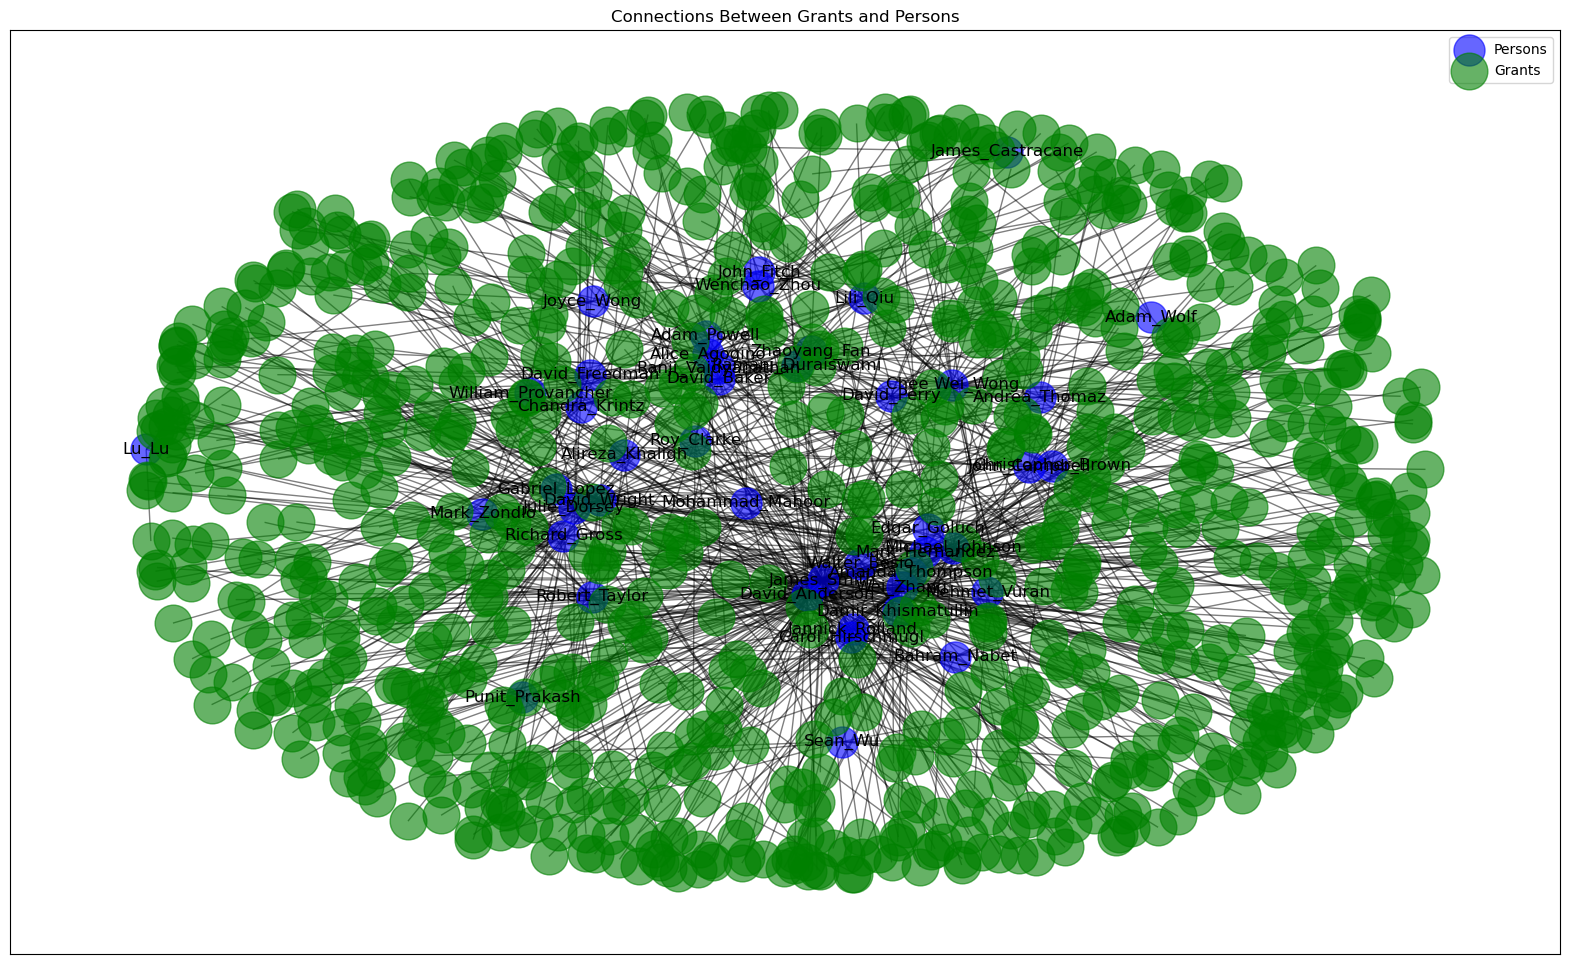

In [32]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.Graph()

# Add nodes and edges
for _, row in filtered_df.iterrows():
    person_node = row['PersonID']
    grant_node = row['AwardID']
    
    # Add nodes
    G.add_node(person_node, type='person', label=person_node)
    G.add_node(grant_node, type='grant', label=row['AwardTitle'], grant_type=row['GrantType'])
    
    # Add edge
    G.add_edge(person_node, grant_node)

# Draw the graph with better layout
pos = nx.spring_layout(G, k=0.3)  # Adjust the value of 'k' for better spacing
plt.figure(figsize=(20, 12))  # Increase figure size for better readability

person_nodes = [n for n in G.nodes if G.nodes[n]['type'] == 'person']
grant_nodes = [n for n in G.nodes if G.nodes[n]['type'] == 'grant']

nx.draw_networkx_nodes(G, pos, nodelist=person_nodes, node_color='blue', node_size=500, alpha=0.6, label='Persons')
nx.draw_networkx_nodes(G, pos, nodelist=grant_nodes, node_color='green', node_size=700, alpha=0.6, label='Grants')
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

# Only show labels for persons
person_labels = {n: G.nodes[n]['label'] for n in person_nodes}
nx.draw_networkx_labels(G, pos, labels=person_labels, font_size=12, font_color='black')

plt.legend(scatterpoints=1)
plt.title("Connections Between Grants and Persons")
plt.show()

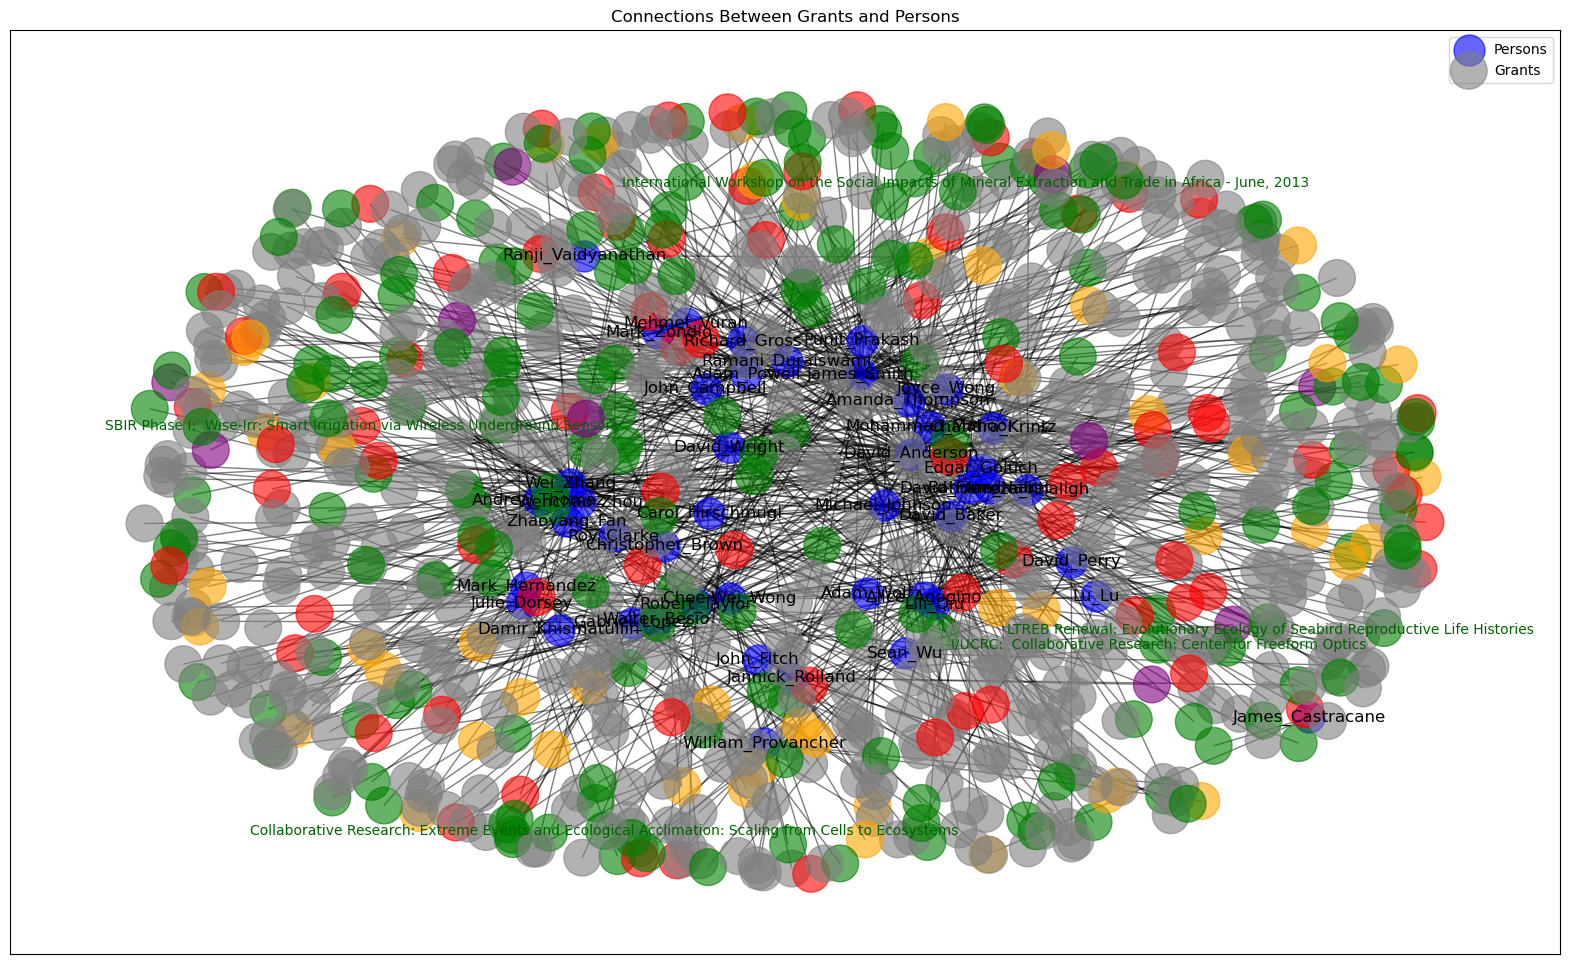

In [33]:
G = nx.Graph()

# Add nodes and edges
for _, row in filtered_df.iterrows():
    person_node = row['PersonID']
    grant_node = row['AwardID']
    
    # Add nodes
    G.add_node(person_node, type='person', label=person_node)
    G.add_node(grant_node, type='grant', label=row['AwardTitle'], grant_type=row['GrantType'])
    
    # Add edge
    G.add_edge(person_node, grant_node)

# Draw the graph with better layout
pos = nx.spring_layout(G, k=0.3)  # Adjust the value of 'k' for better spacing
plt.figure(figsize=(20, 12))  # Increase figure size for better readability

person_nodes = [n for n in G.nodes if G.nodes[n]['type'] == 'person']
grant_nodes = [n for n in G.nodes if G.nodes[n]['type'] == 'grant']

grant_colors = {
    'Research': 'green',
    'I-Corps': 'orange',
    'SBIR': 'red',
    'STTR': 'purple',
    'Other': 'gray',
    'Unknown': 'black'
}

node_colors = [grant_colors[G.nodes[n].get('grant_type', 'Other')] if G.nodes[n]['type'] == 'grant' else 'blue' for n in G.nodes]

nx.draw_networkx_nodes(G, pos, nodelist=person_nodes, node_color='blue', node_size=500, alpha=0.6, label='Persons')
nx.draw_networkx_nodes(G, pos, nodelist=grant_nodes, node_color=[grant_colors[G.nodes[n]['grant_type']] for n in grant_nodes], node_size=700, alpha=0.6, label='Grants')
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

# Only show labels for persons and a few grant labels for clarity
person_labels = {n: G.nodes[n]['label'] for n in person_nodes}
grant_labels = {n: G.nodes[n]['label'] for n in grant_nodes[:5]}  # Show only first 5 grant labels
nx.draw_networkx_labels(G, pos, labels=person_labels, font_size=12, font_color='black')
nx.draw_networkx_labels(G, pos, labels=grant_labels, font_size=10, font_color='darkgreen')

plt.legend(scatterpoints=1)
plt.title("Connections Between Grants and Persons")
plt.show()


In [34]:
# Filter the DataFrame to include only Research and I-Corps grants
research_icorps_df = df[df['GrantType'].isin(['Research', 'I-Corps'])]

In [38]:
# Group by PersonID and aggregate the GrantTypes
grant_summary = research_icorps_df.groupby('PersonID')['GrantType'].apply(lambda x: ','.join(sorted(set(x))))

In [39]:
investigators_with_both = grant_summary[grant_summary.str.contains('Research') & grant_summary.str.contains('I-Corps')].index

In [42]:
# Count the number of unique investigators
num_investigators_with_both = len(investigators_with_both)

print(f"Number of investigators who have moved from Research to I-Corps: {num_investigators_with_both}")


Number of investigators who have moved from Research to I-Corps: 1285


In [40]:
investigators_df = research_icorps_df[research_icorps_df['PersonID'].isin(investigators_with_both)]


In [41]:
investigators_df

AwardID  InvestigatorNumber Directorate_Abbreviation CFDA_NUM  \
39       1324781                   1                      GEO   47.050   
54       1343083                   1                      TIP   47.041   
85       1302785                   1                      SBE   47.075   
103      1357551                   1                      TIP   47.041   
140      1319602                   1                      CSE   47.070   
...          ...                 ...                      ...      ...   
1886601   454541                   3                      GEO   47.050   
1886839   440051                   3                      O/D   47.079   
1888021   442385                   3                      O/D   47.079   
1888039   443924                   3                      ENG   47.041   
1888507   421579                   3                      ENG   47.041   

        Institution_Phone Institution_OrgUEINum  \
39           4357971226.0          SPE2YDWHDYU4   
54           5852754031.0          F27KDXZMF9Y8   
85           9199663411.0          D3LHU66KBLD5   
103          9798626777.0          QD1MX6N5YTN4   
140          5173555040.0          R28EKN92ZTZ9   
...                   ...                   ...   
1886601      3034926221.0          SPVKK1RC2MZ3   
1886839      9195152444.0          U3NVH931QJJ3   
1888021      7192553153.0          RH87YDXC1AY5   
1888039      8139742897.0          NKAZLXLL7Z91   
1888507      2065434043.0          HD1WMN6945W6   

                                Division_LongName   AwardInstrument  \
39            Div Atmospheric & Geospace Sciences  Continuing Grant   
54                          Translational Impacts    Standard Grant   
85       Division Of Behavioral and Cognitive Sci    Standard Grant   
103                         Translational Impacts    Standard Grant   
140      Div Of Information & Intelligent Systems  Continuing Grant   
...                                           ...               ...   
1886601                Division Of Earth Sciences  Continuing Grant   
1886839  Office Of Internatl Science &Engineering    Standard Grant   
1888021  Office Of Internatl Science &Engineering    Standard Grant   
1888039  Div Of Engineering Education and Centers  Continuing Grant   
1888507    Div Of Chem, Bioeng, Env, & Transp Sys    Standard Grant   

                     Appropriation_Name ProgramElement2_Code  \
39       NSF RESEARCH & RELATED ACTIVIT                  NaN   
54       NSF RESEARCH & RELATED ACTIVIT                  NaN   
85       NSF RESEARCH & RELATED ACTIVIT                  NaN   
103      NSF RESEARCH & RELATED ACTIVIT                  NaN   
140      NSF RESEARCH & RELATED ACTIVIT                  NaN   
...                                 ...                  ...   
1886601  NSF RESEARCH & RELATED ACTIVIT                  NaN   
1886839                             NaN                  NaN   
1888021                             NaN                  NaN   
1888039  NSF RESEARCH & RELATED ACTIVIT                 5761   
1888507                             NaN                  NaN   

         Organization_Code  Institution_City Appropriation_Code  \
39               6020104.0             LOGAN               0113   
54              15030000.0         ROCHESTER               0113   
85               4040000.0       CHAPEL HILL               0113   
103             15030000.0   COLLEGE STATION               0114   
140              5020000.0      EAST LANSING               0113   
...                    ...               ...                ...   
1886601          6030000.0           Boulder               0108   
1886839          1090000.0           RALEIGH                NaN   
1888021          1090000.0  COLORADO SPRINGS                NaN   
1888039          7050000.0             TAMPA               0108   
1888507          7020000.0           SEATTLE                NaN   

        ProgramOfficer_Name Institution_State  \
39          Sylvia Edgerton    

In [43]:
investigators_df.to_csv("Research to I-Corps.csv")